# Exercise 7-2: Principle Component Analysis

In this exercise, we will use principal component analysis (PCA) to perform dimensionality reduction.

## Part 1: Load Example Dataset

The `ex7data1.mat` contains a 2-D dataset.

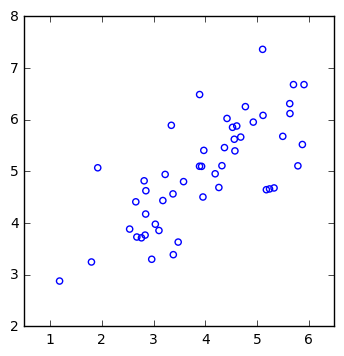

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


mat_data = sio.loadmat('ex7data1.mat')
X = mat_data['X']

plt.figure()
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
plt.xlim(0.5, 6.5)
plt.ylim(2, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [2]:
## Part 2: Principal Component Analysis

The `feature_normalize()` normalizes the features in the given dataset.

In [3]:
def feature_normalize(X):
    """
    Normalizes the features in X.
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        Normalized training vectors.
    mu : ndarray, shape (n_feature, )
        Mean value of each feature.
    sigma : ndarray, shape (n_feature, )
        Standard deviation of each feature.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

The `pca()` runs principal component analysis on the given dataset.

In [4]:
def pca(X):
    """
    Run principal component analysis on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    S : ndarray, shape (n_features,)
        The singular values for every matrix.
    V : ndarray, shape (n_features, n_features)
        Unitary matrices.
    """
    m, n = X.shape
    sigma = X.T.dot(X) / m
    U, S, V = np.linalg.svd(sigma)
    return U, S, V

Run PCA on the loaded dataset:

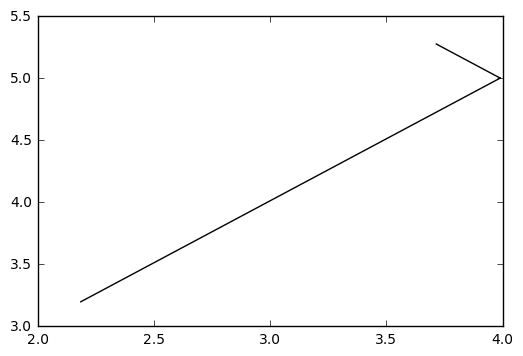

Top eigenvector:
U =  [-0.70710678 -0.70710678]
(you should expect to see -0.70710678 -0.70710678)


In [5]:
from draw_line import draw_line


#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S, V = pca(X_norm)

plt.figure()
draw_line(mu, mu + 1.5 * S[0] * U[:,0].T)
draw_line(mu, mu + 1.5 * S[1] * U[:,1].T)
plt.show()

print 'Top eigenvector:'
print 'U = ', U[:, 0]
print '(you should expect to see -0.70710678 -0.70710678)'

## Part 3: Dimension Reduction

The `project_data()` projects the given data to the top K eigenvectors.

In [6]:
def project_data(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top K eigenvectors.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    K : int
        Reduced dimension.

    Returns
    -------
    Z : ndarray, shape (n_samples, K)
        The projection of X into the reduced dimensional space spanned by the first K columns of U.
    """
    Z = X.dot(U[:, 0:K])
    return Z

The `recover_data()` recovers an approximation of the original data from the projected data.

In [7]:
def recover_data(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data.
    
    Parameters
    ----------
    Z : ndarray, shape (n_samples, K)
        The projected data, where n_samples is the number of samples and K is the number of reduced dimensions.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices, where n_features is the number of features.
    K : int
        Reduced dimension.

    Returns
    -------
    X_rec : ndarray, shape (n_samples, n_features)
        The recovered samples.
    """
    X_rec = Z.dot(U[:, 0:K].T)
    return X_rec

Then we can plot the projection by computing the projected and recovered data:

Projection of the first example:  [ 1.48127391]
(this value should be about 1.48127391)
Approximation of the first example: [-1.04741883 -1.04741883]
(this value should be about  -1.04741883 -1.04741883)


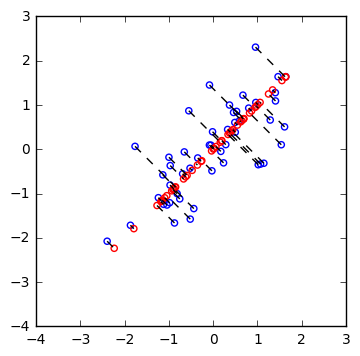

In [8]:
# Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b')
plt.xlim(-4, 3)
plt.ylim(-4, 3)
plt.gca().set_aspect('equal', adjustable='box')

# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print 'Projection of the first example: ', Z[0, ]
print '(this value should be about 1.48127391)'

X_rec = recover_data(Z, U, K)
print 'Approximation of the first example:', X_rec[0, ]
print '(this value should be about  -1.04741883 -1.04741883)'

# Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:], X_rec[i,:], dash=True)
axes = plt.gca()
axes.set_xlim([-4, 3])
axes.set_ylim([-4, 3])
axes.set_aspect('equal', adjustable='box')
plt.show()


## Part 4: Loading and Visualizing Face Data

The dataset `ex7faces.mat` contains a collection of 32 × 32 grayscale face images.

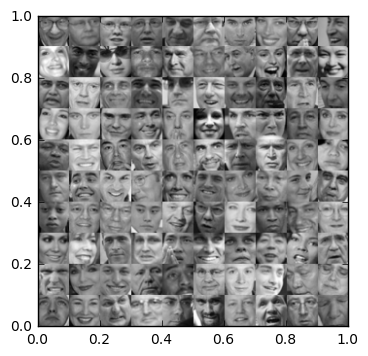

In [9]:
from display_data import display_data


# Load Face dataset
mat_data = sio.loadmat('ex7faces.mat')
X = mat_data['X']

plt.figure()
display_data(X[0:100, :])
plt.show()

## Part 5: PCA on Face Data: Eigenfaces 

Run PCA on the loaded face data:

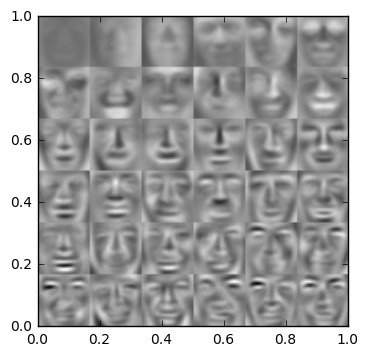

In [10]:
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S, V = pca(X_norm)

# Visualize the top 36 eigenvectors found
plt.figure()
display_data(U[:, 0:36].T)
plt.show()

## Part 6: Dimension Reduction for Faces 

Reduce the dimension of the sample from 1024 (32 by 32) to 100:

In [11]:
K = 100
Z = project_data(X_norm, U, K)

print 'The projected data Z has a size of:', Z.shape

The projected data Z has a size of: (5000, 100)


## Part 7: Visualization of Faces after PCA Dimension Reduction

Plot the original images and the ones reconstructed from only the top 100 principal components:

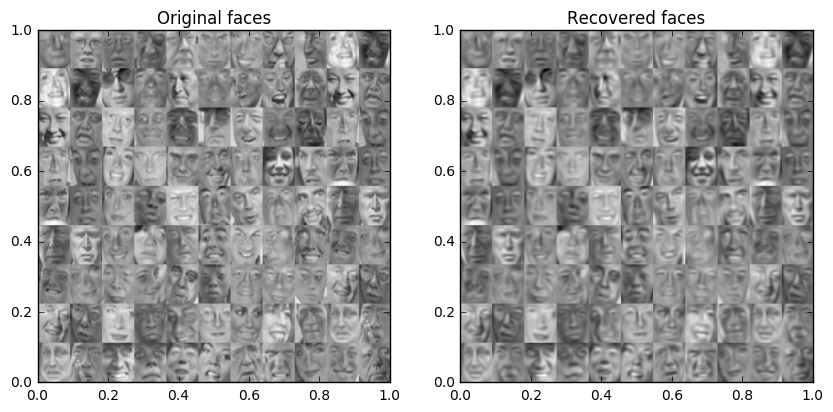

In [12]:
K = 100
X_rec = recover_data(Z, U, K)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
display_data(X_norm[1:100,:], axes=ax1)
ax1.set_title('Original faces')
ax2 = fig.add_subplot(1, 2, 2)
display_data(X_rec[1:100,:], axes=ax2)
ax2.set_title('Recovered faces')
plt.show()

## Part 8(a): Optional (ungraded) Exercise: PCA for Visualization

In the prevous K-Means Clustering exercise, we used the K-means algorithm in the 3-dimensional RGB space. Now we plot the centroid assignments in 3-D.

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


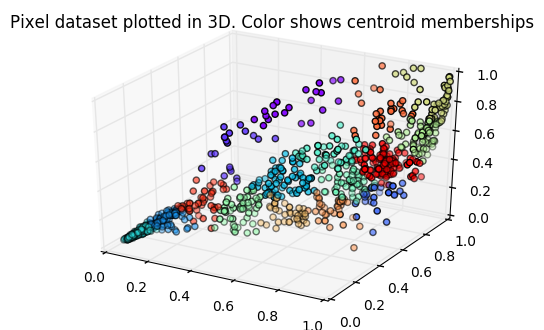

In [13]:
from scipy.misc import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from k_means_init_centroids import k_means_init_centroids
from run_k_means import run_k_means

A = imread('bird_small.png')

A = A.astype(float)/255
img_size = A.shape
X = A.reshape([img_size[0] * img_size[1], img_size[2]])
K = 16
max_iters = 10
initial_centroids = k_means_init_centroids(X, K)
[centroids, idx] = run_k_means(X, initial_centroids, max_iters)

sel = np.random.randint(X.shape[0], size=1000)

# Setup Color Palette
color = cm.rainbow(np.linspace(0, 1, K))

#  Visualize the data and centroid memberships in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], c=color[idx[sel].astype(int), :], marker='o')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

## Part 8(b): Optional (ungraded) Exercise: PCA for Visualization

With the help of PCA, we can project the 3-D cloud to 2D for visualization.

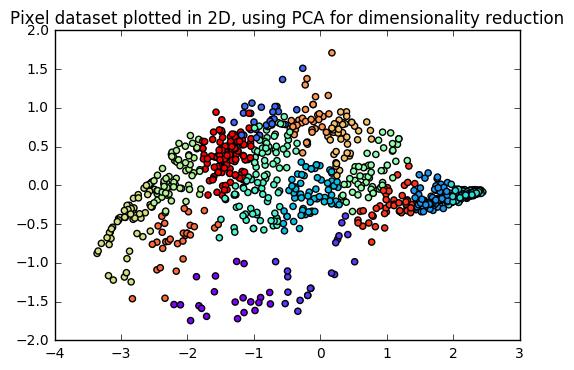

In [14]:
from plot_data_points import plot_data_points


# Subtract the mean to use PCA
X_norm, mu, sigma = feature_normalize(X)

# PCA and project the data to 2D
U, S, V = pca(X_norm)
Z = project_data(X_norm, U, 2)

# Plot in 2D
plt.figure()
plot_data_points(Z[sel, ], idx[sel, ], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()